# Tweet Classification


This is my Oracle ML Techical Assessement, Here we will try to build some Binary classifiers to decice if a Tweet is about Sport or Politics, And then we will take the best model




In [1]:
# Viz
import matplotlib.pyplot as plt


# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



import pandas as pd
import numpy as np


## Importing Data and preprocessing it

In [2]:
# Import the dataset
train = pd.read_csv("train.csv")
print(f"We have {train.shape[0]} rows and {train.shape[1]} columns")
# Let's check the first rows
print("First rows :\n",train.head())
# map target varible to 0/1
train["Label"] = train["Label"].map({'Politics': 0, 'Sports': 1})
# Let's check the first rows
print("First rows :\n",train.head())

We have 6525 rows and 3 columns
First rows :
               TweetId     Label  \
0  304271250237304833  Politics   
1  304834304222064640  Politics   
2  303568995880144898    Sports   
3  304366580664528896    Sports   
4  296770931098009601    Sports   

                                           TweetText  
0  '#SecKerry: The value of the @StateDept and @U...  
1                            '@rraina1481 I fear so'  
2  'Watch video highlights of the #wwc13 final be...  
3  'RT @chelscanlan: At Nitro Circus at #AlbertPa...  
4  '@cricketfox Always a good thing. Thanks for t...  
First rows :
               TweetId  Label  \
0  304271250237304833      0   
1  304834304222064640      0   
2  303568995880144898      1   
3  304366580664528896      1   
4  296770931098009601      1   

                                           TweetText  
0  '#SecKerry: The value of the @StateDept and @U...  
1                            '@rraina1481 I fear so'  
2  'Watch video highlights of the #wwc13 

In [3]:
# Defining our feature and target variables
vectorizer = TfidfVectorizer()
X, y = train["TweetText"], train["Label"]
# Now we're going to convert text data into numerical features using TF-IDF
X = vectorizer.fit_transform(X)
# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)

## Building Models and comparing them

### SVM
This is my first choice, support vector machines.


In [4]:
def svmModel(c, g):
    # rbf kernel, there is no way this data can be separated using a linear line
    svm_tweet = svm.SVC(kernel="rbf", gamma=g, C=c ,random_state=42)
    # Training
    svm_tweet.fit(X_train, y_train)
    return svm_tweet

Now I will choose RBF instead of a linear kernel, The data doesn't look like it can be splitted with a linear separator.
I will iterate over C and Gamma to find the best choice.

In [5]:
# Here I will iterate to find the best C and gamma parameters
Clist = [0.5, 0.7, 1.0]
GammaList = np.linspace(0.05, 1.0, 11, endpoint=True)
# This list will contain [best C, best gamma, best score]
optim = [0, 0, 0]
for c in Clist:
    for g in GammaList: 
        model = svmModel(c, g)
        predicted_svm = model.predict(X_test)
        score = accuracy_score(y_test, predicted_svm)
        print(f"C = {c} || Gamma = {g} || Score = {score}")
        if score > optim[2]:
            optim = [c, g, score]
print(f"\n\n\n best model C={optim[0]}, Gamma={optim[1]}, accuracy_score={optim[2]}")

C = 0.5 || Gamma = 0.05 || Score = 0.8907048008171604
C = 0.5 || Gamma = 0.14500000000000002 || Score = 0.9203268641470889
C = 0.5 || Gamma = 0.24 || Score = 0.9300306435137896
C = 0.5 || Gamma = 0.335 || Score = 0.9315628192032687
C = 0.5 || Gamma = 0.43 || Score = 0.933605720122574
C = 0.5 || Gamma = 0.525 || Score = 0.9356486210418795
C = 0.5 || Gamma = 0.6200000000000001 || Score = 0.9361593462717058
C = 0.5 || Gamma = 0.7150000000000001 || Score = 0.9361593462717058
C = 0.5 || Gamma = 0.81 || Score = 0.9361593462717058
C = 0.5 || Gamma = 0.905 || Score = 0.9366700715015321
C = 0.5 || Gamma = 1.0 || Score = 0.9361593462717058
C = 0.7 || Gamma = 0.05 || Score = 0.9106230847803881
C = 0.7 || Gamma = 0.14500000000000002 || Score = 0.9295199182839632
C = 0.7 || Gamma = 0.24 || Score = 0.9356486210418795
C = 0.7 || Gamma = 0.335 || Score = 0.9402451481103167
C = 0.7 || Gamma = 0.43 || Score = 0.9412665985699693
C = 0.7 || Gamma = 0.525 || Score = 0.9433094994892748
C = 0.7 || Gamma = 0.

##### Conclusion:
These are some good results, 0.94 score accuracy is awesome, let's try to find a better model

### Decision Tree

Now I will try Decision Tree and Random Forest

#### Decision tree


To prevent Overfitting, I will set a maximum for my max_leaf_nodes. Again, I will iterate over a range of values for max_leaf_nodes and find the best values from the plot. 

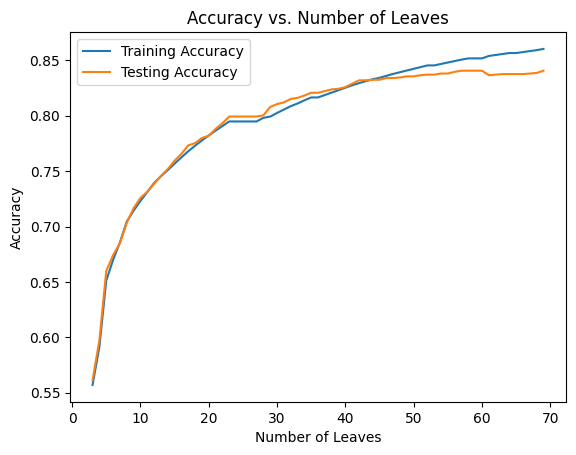

The best DecisionTree score (on test data) is : 0.8406537282941777


In [6]:
# I will plot te scores of Decision Tree score given the number of max_leaf_nodes
accuracy_train = list()
accuracy_test = list()

leaves = range(3, 70)

for nb_leaf in leaves:
    tweetTree = DecisionTreeClassifier(max_leaf_nodes=nb_leaf, random_state=42)
    tweetTree.fit(X_train, y_train)
    predicted_tree_validation = tweetTree.predict(X_test)
    predicted_tree_train = tweetTree.predict(X_train)
    accuracy_test += [accuracy_score(y_test, predicted_tree_validation)]
    accuracy_train += [accuracy_score(y_train, predicted_tree_train)]
    
    

plt.clf()
plt.plot(leaves, accuracy_train, label='Training Accuracy')
plt.plot(leaves, accuracy_test, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy vs. Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Accuracy')
plt.show()

print(f"The best DecisionTree score (on test data) is : {max(accuracy_test)}")

##### Conclusion:
Decision Tree perform worse than SVM, as you can see the best score is 0.84, and then we start to see overfitting. Now we will try Random Forest.

#### Random forest

We switch to Random Forest to see if we can get better accuracy without overfitting.

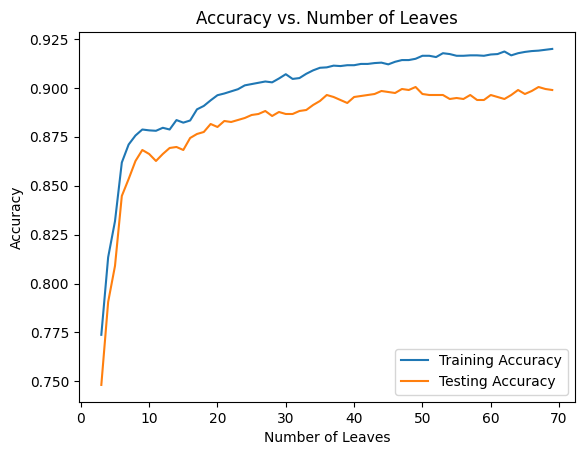

The best RandomForest score (on test data) is : 0.900408580183861


In [7]:
# I will plot te scores of Random Forest score given the number of max_leaf_nodes
accuracy_train = list()
accuracy_test = list()

leaves = range(3, 70)

for nb_leaf in leaves:
    rf_tweetTree = RandomForestClassifier(max_leaf_nodes=nb_leaf, random_state=42)
    rf_tweetTree.fit(X_train, y_train)
    predicted_rf_validation = rf_tweetTree.predict(X_test)
    predicted_rf_train = rf_tweetTree.predict(X_train)
    accuracy_test += [accuracy_score(y_test, predicted_rf_validation)]
    accuracy_train += [accuracy_score(y_train, predicted_rf_train)]

    

plt.clf()
plt.plot(leaves, accuracy_train, label='Training Accuracy')
plt.plot(leaves, accuracy_test, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy vs. Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Accuracy')
plt.show()

print(f"The best RandomForest score (on test data) is : {max(accuracy_test)}")

##### Conclusion:
This is much better than Decision Tree, but still couldn't beat the SVM Model.

# Results

Now I will generate the test.csv results for the assessement

In [8]:

# Import the dataset
test = pd.read_csv("test.csv")
print(test.head())
# Using the optimal parameters
svm_tweet = svm.SVC(kernel="rbf", gamma=optim[1], C=optim[0] ,random_state=42)
# Training on the whole train.csv data to feed as much as we can out model
svm_tweet.fit(X, y)
predicted_svm = svm_tweet.predict(X)
accuracyScore = accuracy_score(y, predicted_svm)  
print(f"Accuracy Score on the whole train.csv file data : {accuracyScore}")

# Now we will predict the test.csv file
testX = vectorizer.transform(test["TweetText"])
predicted_svm = svm_tweet.predict(testX)
print("Predicted values on the test.csv file: ", predicted_svm)
predicted_categories = np.where(predicted_svm == 0, 'Politics', 'Sports')
print("Predicted values on the test.csv file after mapping them: ", predicted_categories)
# Constructing the pd
TweetId_series = test["TweetId"]
Label_series = pd.Series(predicted_categories)
result = pd.DataFrame({'TweetId': TweetId_series, 'Label': Label_series})
print(result.head())
# exporting the results
result.to_csv('output.csv', index=False)


              TweetId                                          TweetText
0  306486520121012224  '28. The home side threaten again through Maso...
1  286353402605228032  '@mrbrown @aulia Thx for asking. See http://t....
2  289531046037438464  '@Sochi2014 construction along the shores of t...
3  306451661403062273  '#SecKerry\u2019s remarks after meeting with F...
4  297941800658812928  'The #IPLauction has begun. Ricky Ponting is t...
Accuracy Score on the whole train.csv file data : 0.9995402298850574
Predicted values on the test.csv file:  [1 0 0 ... 1 0 1]
Predicted values on the test.csv file after mapping them:  ['Sports' 'Politics' 'Politics' ... 'Sports' 'Politics' 'Sports']
              TweetId     Label
0  306486520121012224    Sports
1  286353402605228032  Politics
2  289531046037438464  Politics
3  306451661403062273  Politics
4  297941800658812928    Sports
